# <font color="blue"> [기계학습 7W] 의사결정나무 (Decision Tree) </font>

2022년 1학기, 광운대학교, 기계학습

> #### 지난시간에 학습한 의사결정나무의 알고리즘을 실습한다. <br/>
> ####  알고리즘은 CART 알고리즘을 기반으로 적용하며, 모델의 적합, 평가, 그리고 일반화 성능을 높이기 위한 가지치기까지 수행해본다.

[1. 실험환경 구성 (Experimental setting)](#1.-실험환경-구성-(Experimental-setting))  
[2. 데이터 불러오기 (Data loading)](#2.-데이터-불러오기-(Data-loading))  
>[데이터 확인](#데이터-확인)  
>[학습, 테스트 데이터 분리](#학습,-테스트-데이터-분리)  

[3. 의사결정나무 모델 구축 (Classification Tree)](#3.-의사결정나무-모델-구축-(Classification-Tree)) 
>[의사결정나무 모델 가시화](#의사결정나무-모델-가시화) 

[4. 의사결정나무 모델 테스트 ](#4.-의사결정나무-모델-테스트) 
>[Cross Validation](#Cross Validation)  

[5. 가지치기 수행 (Pruning phase)](#5.-가지치기-수행-(Pruning-phase)) 

# 1. 실험환경 구성 (Experimental setting)

In [1]:
# 라이브러리 로드
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')


# 2. 데이터 불러오기 (Data loading)

## 데이터 로드

In [2]:
cancer = load_breast_cancer()

## 학습, 테스트 데이터 분리

In [3]:
seed = 5764

# 학습, 테스트 데이터 분리 (0.7:0.3)
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.7, random_state=seed)

In [4]:
print(len(x_train), '\n')
print(len(x_test), '\n')

170 

399 



# 3. 의사결정나무 모델 구축 (Classification Tree)

In [51]:
dt_clf = DecisionTreeClassifier(random_state=5764)
dt_clf.fit(x_train, y_train) # 학습

DecisionTreeClassifier(random_state=5764)

## 의사결정나무 모델 가시화

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [52]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = cancer.target_names, feature_names = cancer.feature_names, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


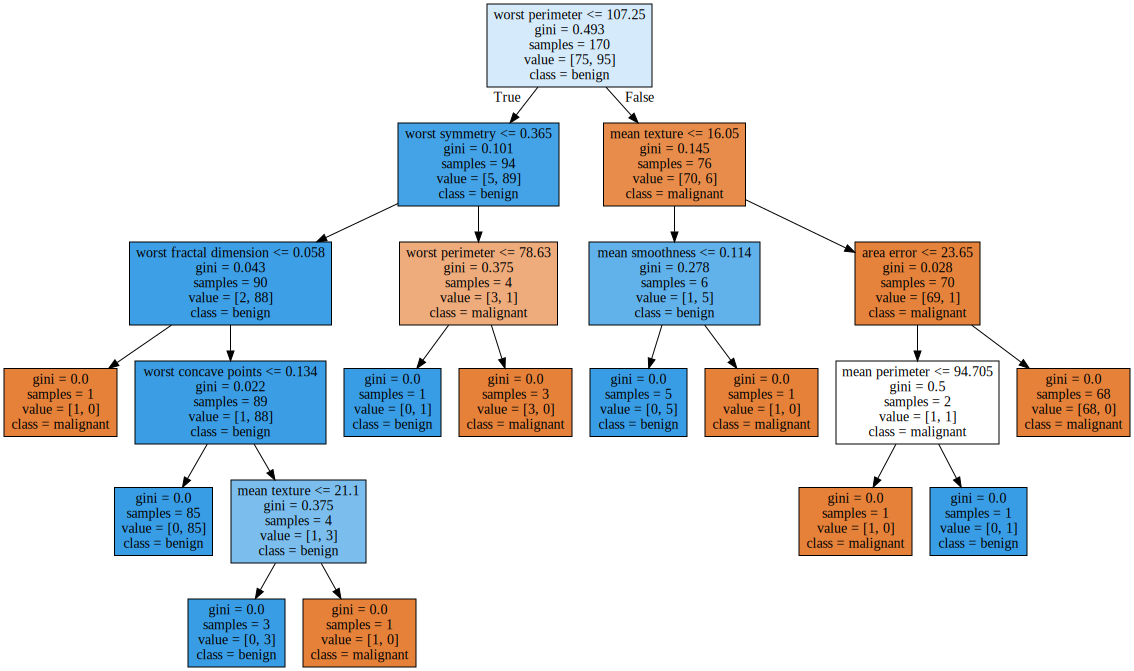

In [53]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니계수
- samples : 현 규칙에 해당하는 데이터 건수
- value=[] : 클래스 값(y label)에 해당하는 데이터 건수

# 4. 의사결정나무 모델 테스트

In [54]:
y_pred = dt_clf.predict(x_test) 

In [55]:

# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9197994987468672 

Accuracy:  0.92 

Recall:  0.95 

Precision:  0.93 

F1_score:  0.94 

Confusion Matrix: 
 [[119  18]
 [ 14 248]]


## Cross Validation

In [56]:
# 교차검증

x = cancer.data
y = cancer.target

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.9120943952802361


In [57]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.006983,0.001029,0.912281
1,0.006979,0.000999,0.921053
2,0.009974,0.000998,0.903509
3,0.009941,0.000000,0.929825
4,0.006977,0.001031,0.893805


In [58]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.9197994987468672

# 5. 가지치기 수행 (Pruning phase)

In [59]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))


Accuracy of training set: 0.971
Accuracy of test set: 0.932


> 가지치기 수행 전보다 test set에 대한 정확도가 향상됨을 확인할 수 있다. (0.9298 -> 0.9706)

In [60]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = cancer.target_names, feature_names = cancer.feature_names, impurity=True, filled=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


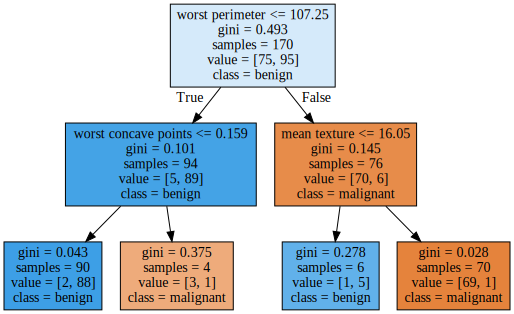

In [61]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

※ Graphviz Error 발생 시 https://graphviz.gitlab.io/ 사이트에서 installer를 설치하고 시스템 환경변수 설정완료 후 파이썬 세션을 재실행할 것